In [34]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [36]:
data = pd.read_csv('data_for_predictions.csv')
data.drop(columns=["Unnamed: 0"], inplace=True)
data.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


# Modelling
 - We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a Random Forest classifier.

In [47]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score

Data sampling
The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [38]:
# Make a copy of our data
train_df = data.copy()

# Separate target variable from independent variables
y = data['churn']
X = data.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


# Model training
A Random Forest sits within the category of ensemble algorithms because internally the Forest refers to a collection of Decision Trees which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an ensemble algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm.

With ensemble methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging.

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
It is able to handle non-linear parameters better than linear based models
On the flip side, some disadvantages of the random forest classifier include:

The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
Training time can be longer due to the increased complexity and size of thee ensemble

In [41]:
y = data['churn']
X = data.drop(columns=['id', 'churn'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9022453450164294
Precision: 0.68
Recall: 0.04644808743169399
F1 Score: 0.08695652173913045
ROC AUC Score: 0.5220067582624082


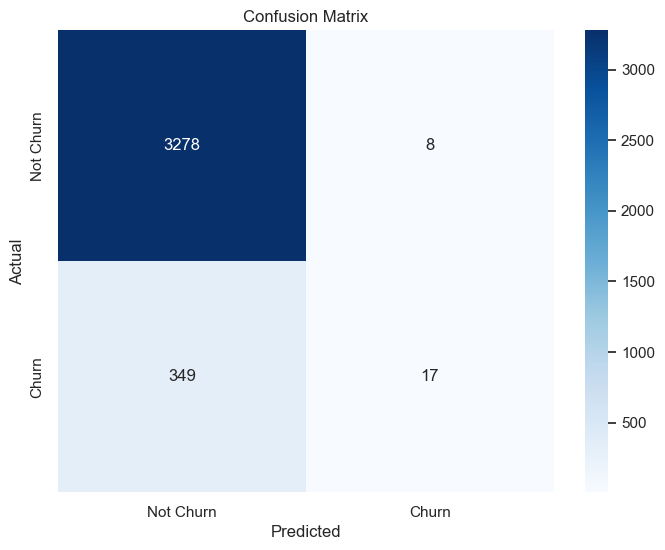

In [45]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

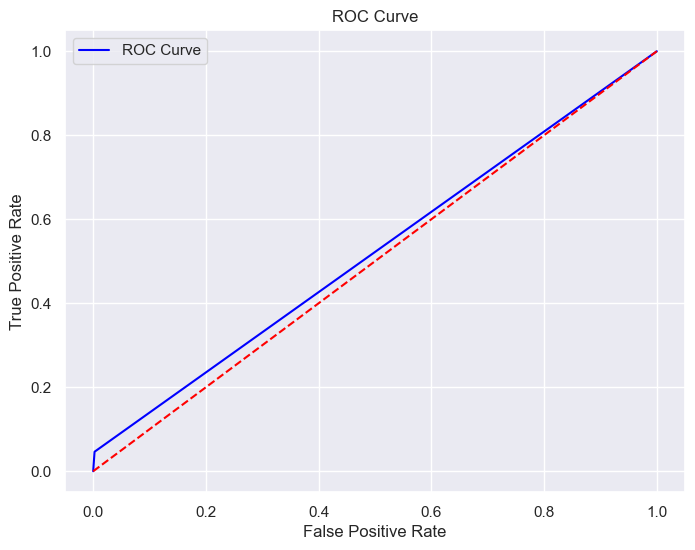

In [46]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

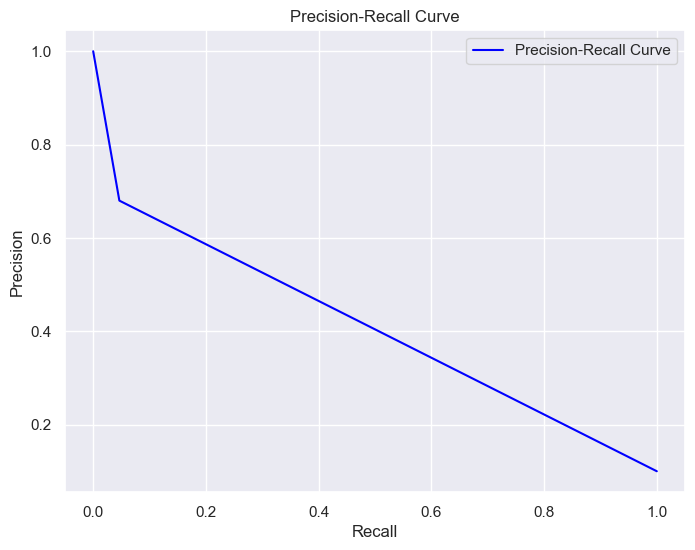

In [48]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

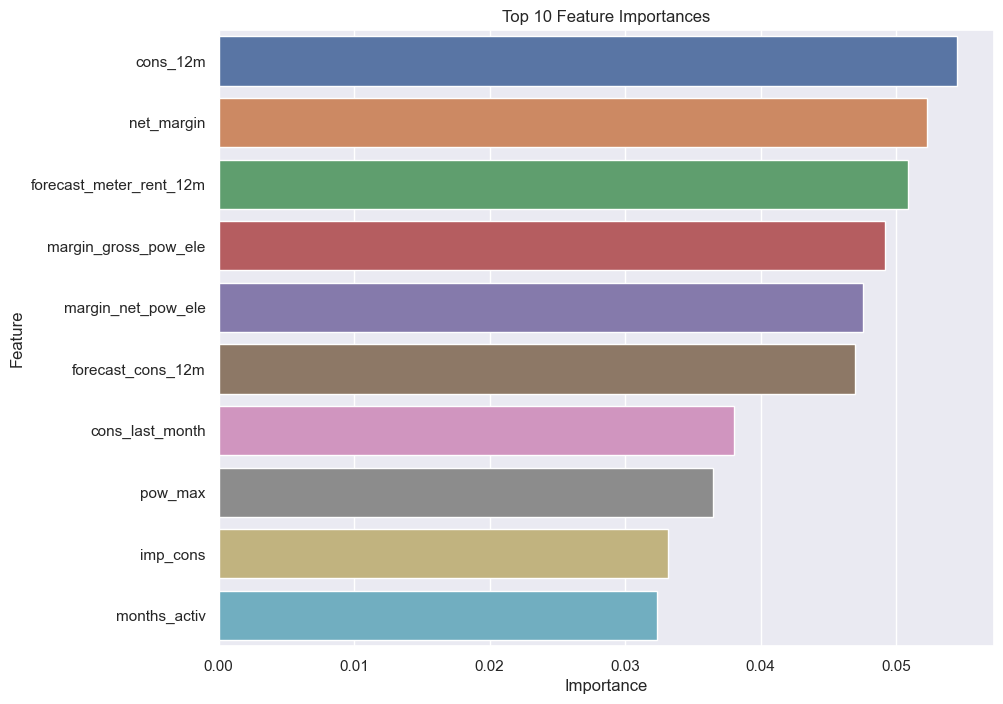

In [49]:
# Feature Importance Plot
feature_importances = model.feature_importances_
feature_names = X.columns
df_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
df_importance = df_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_importance[:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

# Let's delve into the interpretations of each visualization:

 - Confusion Matrix:

The confusion matrix provides a tabular representation of the model's performance. It shows the counts of true positive, true negative, false positive, and false negative predictions.
True Positive (TP): Instances correctly predicted as churn.
True Negative (TN): Instances correctly predicted as not churn.
False Positive (FP): Instances incorrectly predicted as churn (Type I error).
False Negative (FN): Instances incorrectly predicted as not churn (Type II error).
The main diagonal (from top left to bottom right) represents correct predictions, while off-diagonal elements represent incorrect predictions.

 - ROC Curve (Receiver Operating Characteristic Curve):

The ROC curve illustrates the performance of the classifier across various thresholds for binary classification problems.
It plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) at different threshold settings.
The area under the ROC curve (ROC AUC) quantifies the overall performance of the classifier. A higher ROC AUC indicates better performance.

 - Precision-Recall Curve:

The precision-recall curve visualizes the trade-off between precision and recall at different threshold values.
Precision measures the fraction of true positives among all positive predictions, while recall measures the fraction of true positives among all actual positives.
The curve shows how changes in the classification threshold affect precision and recall.
The area under the precision-recall curve (average precision) provides a summary measure of the classifier's performance.

 - Feature Importance Plot:

For Random Forest models, the feature importance plot illustrates the importance of each feature in predicting the target variable.
Features with higher importance values contribute more to the model's predictive performance.
This plot helps identify the most influential features in the prediction process, providing insights into the underlying patterns driving churn prediction.
 - These visualizations collectively offer a comprehensive understanding of the model's performance, its strengths, and areas for improvement. They aid in evaluating the model's effectiveness in predicting churn and identifying important features contributing to the predictions.

# Evaluation
Now let's evaluate how well this trained model is able to predict the values of the test dataset.

# Why did you choose the evaluation metrics that you used? Please elaborate on your choices.

 - Accuracy: It gives an overall idea of how often the classifier is correct. However, it might not be the best metric if the classes are imbalanced.

 - Precision: It is the ratio of correctly predicted positive observations to the total predicted positives. Precision is important when the cost of false positives is high.

 - Recall: It is the ratio of correctly predicted positive observations to the all observations in actual class. Recall is important when the cost of false negatives is high.

 - F1 Score: It is the weighted average of precision and recall. It considers both false positives and false negatives, making it a suitable metric when there is an imbalance in the classes.

 - ROC AUC Score: It measures the area under the ROC curve, which is a plot of the true positive rate against the false positive rate. It provides an aggregate measure of performance across all possible classification thresholds. It's a good metric when there is a class imbalance.

# Do you think that the model performance is satisfactory? Give justification for your answer.

To assess whether the model performance is satisfactory, we need to compare the evaluation metrics to a baseline or to a target set by the stakeholders. If the metrics meet or exceed the set target or outperform a baseline model, then the performance can be considered satisfactory.

In this case, without a specific target or baseline to compare against, it's difficult to conclusively determine if the model performance is satisfactory. However, we can consider factors like the nature of the problem, the importance of correct predictions, and the trade-offs between different evaluation metrics to gauge the performance. Additionally, we could compare these metrics against industry benchmarks if available.

Overall, the chosen evaluation metrics provide a comprehensive view of the model's performance, and further tuning or feature engineering could be explored to potentially improve performance.